In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
# SPI12 데이터 불러오기
df = pd.read_csv('SPI12_2015to2023.csv',encoding='cp949')

In [4]:
# 지점 번호 열 제거
df = df.drop('지점',axis=1).copy()

In [5]:
# 일시 열 데이터타입 변경
df['일시'] = pd.to_datetime(df['일시'])

In [6]:
# 연도, 월 컬럼 추가
df['연도'] = df['일시'].dt.year
df['월'] = df['일시'].dt.month

In [7]:
# 지역별로 나눠 데이터프레임 생성
CH_df = df[df['지점명']=='춘천'].drop('지점명',axis=1)
GR_df = df[df['지점명']=='강릉'].drop('지점명',axis=1)
SE_df = df[df['지점명']=='서울'].drop('지점명',axis=1)
IC_df = df[df['지점명']=='인천'].drop('지점명',axis=1)
DJ_df = df[df['지점명']=='대전'].drop('지점명',axis=1)
DG_df = df[df['지점명']=='대구'].drop('지점명',axis=1)
GJ_df = df[df['지점명']=='광주'].drop('지점명',axis=1)
BS_df = df[df['지점명']=='부산'].drop('지점명',axis=1)

In [8]:
# 월별 SPI12 평균값 받을 빈 리스트 생성
CH_spi12_list = []
GR_spi12_list = []
SE_spi12_list = []
IC_spi12_list = []
DJ_spi12_list = []
DG_spi12_list = []
GJ_spi12_list = []
BS_spi12_list = []
year = [2015,2016,2017,2018,2019,2020,2021,2022,2023]
month = [1,2,3,4,5,6,7,8,9,10,11,12]

In [9]:
# 춘천
for y in year:
    for m in month:
        spi12 = round(CH_df[(CH_df['연도']==y) & (CH_df['월']==m)].describe().loc['mean','SPI12'],2)
        CH_spi12_list.append(spi12)

In [10]:
# 강릉
for y in year:
    for m in month:
        spi12 = round(GR_df[(GR_df['연도']==y) & (GR_df['월']==m)].describe().loc['mean','SPI12'],2)
        GR_spi12_list.append(spi12)

In [11]:
# 서울
for y in year:
    for m in month:
        spi12 = round(SE_df[(SE_df['연도']==y) & (SE_df['월']==m)].describe().loc['mean','SPI12'],2)
        SE_spi12_list.append(spi12)

In [12]:
# 인천
for y in year:
    for m in month:
        spi12 = round(IC_df[(IC_df['연도']==y) & (IC_df['월']==m)].describe().loc['mean','SPI12'],2)
        IC_spi12_list.append(spi12)

In [13]:
# 대전
for y in year:
    for m in month:
        spi12 = round(DJ_df[(DJ_df['연도']==y) & (DJ_df['월']==m)].describe().loc['mean','SPI12'],2)
        DJ_spi12_list.append(spi12)

In [14]:
# 대구
for y in year:
    for m in month:
        spi12 = round(DG_df[(DG_df['연도']==y) & (DG_df['월']==m)].describe().loc['mean','SPI12'],2)
        DG_spi12_list.append(spi12)

In [15]:
# 광주
for y in year:
    for m in month:
        spi12 = round(GJ_df[(GJ_df['연도']==y) & (GJ_df['월']==m)].describe().loc['mean','SPI12'],2)
        GJ_spi12_list.append(spi12)

In [16]:
# 부산
for y in year:
    for m in month:
        spi12 = round(BS_df[(BS_df['연도']==y) & (BS_df['월']==m)].describe().loc['mean','SPI12'],2)
        BS_spi12_list.append(spi12)

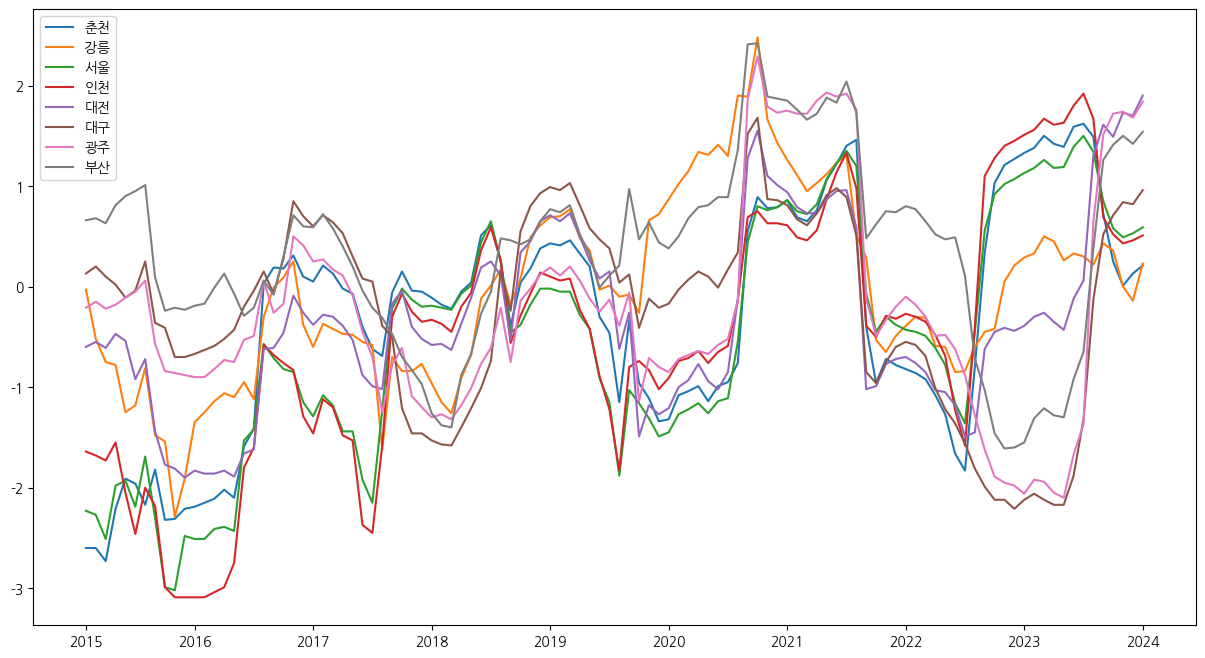

In [17]:
# 선 그래프 그리기
# X축 : 연도와월 / Y축 : SPI 수치
plt.figure(figsize=(15,8))
plt.plot(CH_spi12_list, label='춘천')
plt.plot(GR_spi12_list, label='강릉')
plt.plot(SE_spi12_list, label='서울')
plt.plot(IC_spi12_list, label='인천')
plt.plot(DJ_spi12_list, label='대전')
plt.plot(DG_spi12_list, label='대구')
plt.plot(GJ_spi12_list, label='광주')
plt.plot(BS_spi12_list, label='부산')
plt.rcParams['axes.unicode_minus']=False
plt.xticks([0,11,23,35,47,59,71,83,95,107],[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024])
plt.legend()
plt.show()

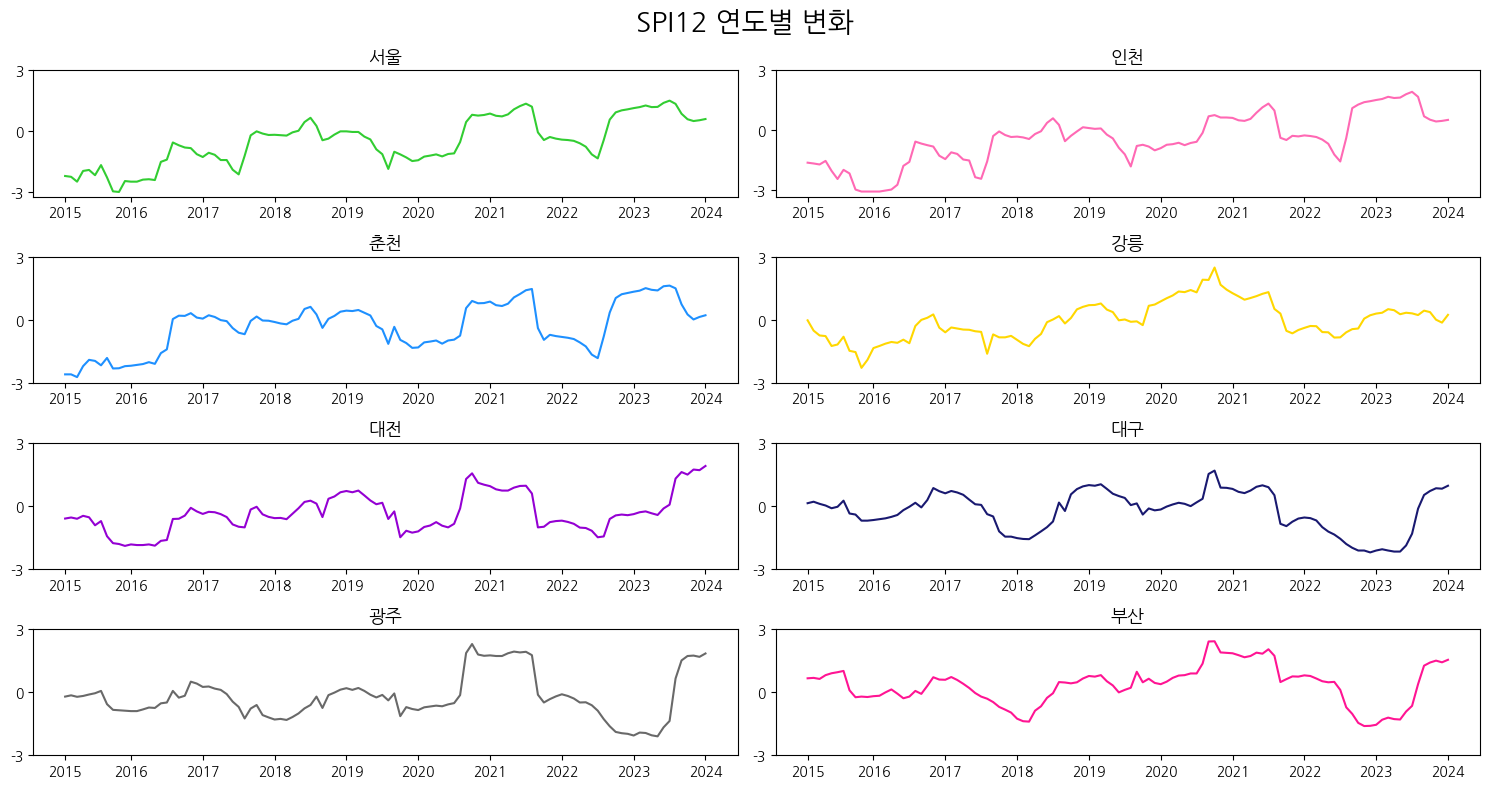

In [19]:
city_list = ['서울','인천','춘천','강릉','대전','대구','광주','부산']
list = [SE_spi12_list,IC_spi12_list,CH_spi12_list,GR_spi12_list,DJ_spi12_list,DG_spi12_list,GJ_spi12_list,BS_spi12_list]
colors = ['limegreen','hotpink','dodgerblue','gold','darkviolet','midnightblue','dimgrey','deeppink']

plt.figure(figsize=(15, 8))
plt.suptitle(f'SPI12 연도별 변화', fontsize=20)

i = 1
for n in range(len(city_list)):
    plt.subplot(4, 2, i)
    plt.title(city_list[n], size=13)
    plt.plot(list[n], color = colors[n])
    i += 1
    plt.rcParams['axes.unicode_minus']=False
    plt.xticks([0,11,23,35,47,59,71,83,95,107],[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024])
    plt.yticks([-3,0,3])
plt.tight_layout()
plt.show()